<a href="https://colab.research.google.com/github/omniaghazy/100_projects_tensorflow/blob/main/Project_10_Multi_Class_Classification_on_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train a neural network using TensorFlow 2 to classify clothing images from the Fashion MNIST dataset into 10 categories.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.7749 - loss: 0.6479 - val_accuracy: 0.8318 - val_loss: 0.4523
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8566 - loss: 0.4007 - val_accuracy: 0.8702 - val_loss: 0.3748
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8731 - loss: 0.3449 - val_accuracy: 0.8753 - val_loss: 0.3508
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8835 - loss: 0.3202 - val_accuracy: 0.8795 - val_loss: 0.3383
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8937 - loss: 0.2933 - val_accuracy: 0.8763 - val_loss: 0.3459
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8957 - loss: 0.2865 - val_accuracy: 0.8792 - val_loss: 0.3446
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9001 - loss: 0.2723 - val_accuracy: 0.8843 - val_loss: 0.3213
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9039 - loss: 0.2576

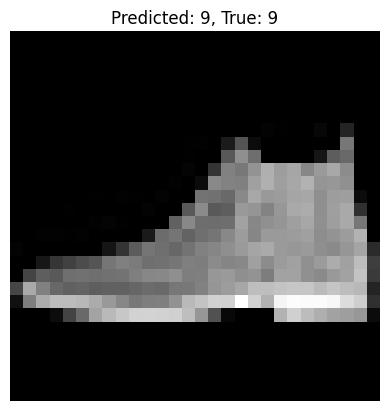

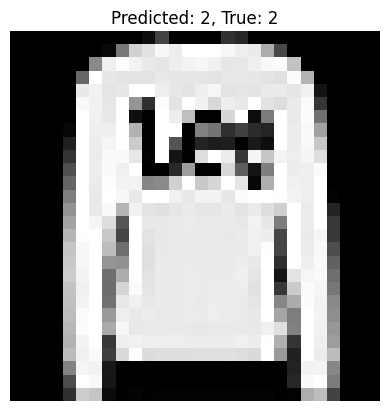

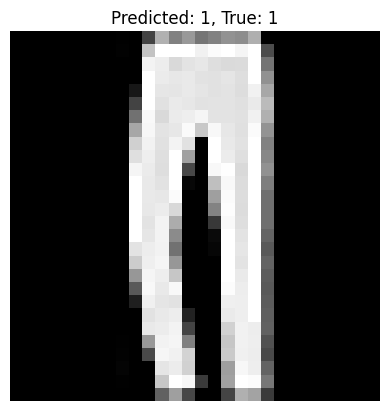

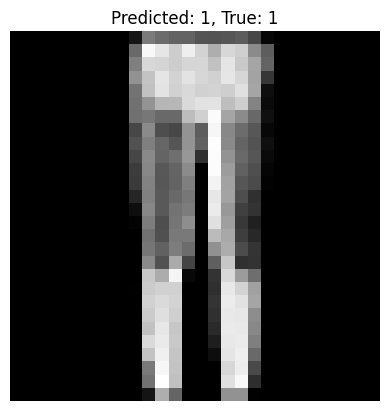

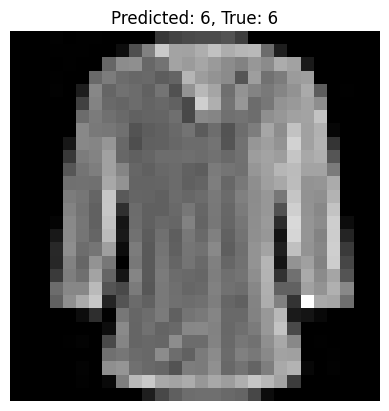

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset from Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to range [0, 1]
X_train = X_train / 255.0                                       # Scale training images
X_test = X_test / 255.0                                         # Scale test images

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),             # Flatten 28x28 images to 784
    tf.keras.layers.Dense(128, activation='relu'),             # Hidden layer with 128 ReLU units
    tf.keras.layers.Dense(10, activation='softmax')            # Output layer for 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_split=0.1, verbose=1)  # Include validation split

# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

# Optional: Display sample predictions
preds = model.predict(X_test[:5])                            # Predict on first 5 test images
for i, pred in enumerate(preds):
    plt.imshow(X_test[i], cmap='gray')
    plt.title(f"Predicted: {pred.argmax()}, True: {y_test[i]}")
    plt.axis('off')
    plt.show()